In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

In [3]:
data_path = '../bct-data-summit/train.csv'
train_data = pd.read_csv(data_path)

drop_columns = ['employeecount', 'standardhours', 'over18']
numerical_col = train_data.select_dtypes(exclude=['object']).columns.tolist()
numerical_col.remove('id')
numerical_col.remove( 'Attrition')
numerical_col.remove('EmployeeCount')
numerical_col.remove('StandardHours')

categorical_col = train_data.select_dtypes(include=['object']).columns.tolist()
categorical_col.remove('Over18')

In [4]:
train_data.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1


In [6]:
# plt.figure(figsize=(20,17))
# no_cols = int(len(numerical_col)/4)
# no_row = int(len(numerical_col)/4) + 1

# for idx, col in enumerate(categorical_col):
    
#     plt.subplot(no_cols, 4, idx + 1)   
#     sns.countplot(x = col, data = train_data, order = train_data[col].value_counts(normalize=True).sort_values().index)
#     plt.xticks(rotation = 90)
# plt.show()

In [7]:
#Checking churning rate in relation to other columns
global_churn_rate = train_data['Attrition'].mean()
print('The churning rate of the company is ',global_churn_rate)

The churning rate of the company is  0.11926058437686345


In [8]:
for i in categorical_col:
    data_group = train_data.groupby(i)['Attrition'].agg(['mean'])
    data_group['difference'] = data_group['mean'] - global_churn_rate
    data_group['risk'] = data_group['mean']/ global_churn_rate
    display(data_group)
    print()
    print()

,mean,difference,risk
BusinessTravel,,,
Non-Travel,0.039683,-0.079578,0.332738
Travel_Frequently,0.195402,0.076142,1.638448
Travel_Rarely,0.111628,-0.007633,0.936000


,mean,difference,risk
Department,,,
Human Resources,0.179487,0.060227,1.505000
Research & Development,0.107969,-0.011291,0.905321
Sales,0.142251,0.022990,1.192771


,mean,difference,risk
EducationField,,,
Human Resources,0.230769,0.111509,1.935000
Life Sciences,0.113548,-0.005712,0.952103
Marketing,0.171053,0.051792,1.434276
Medical,0.114754,-0.004506,0.962213
Other,0.073171,-0.046090,0.613537
Technical Degree,0.132075,0.012815,1.107453


,mean,difference,risk
Gender,,,
Female,0.101142,-0.018119,0.848075
Male,0.129699,0.010439,1.087528


,mean,difference,risk
JobRole,,,
Healthcare Representative,0.064516,-0.054744,0.540968
Human Resources,0.205882,0.086622,1.726324
Laboratory Technician,0.182635,0.063374,1.531392
Manager,0.081081,-0.038180,0.679865
Manufacturing Director,0.025510,-0.093750,0.213903
Research Director,0.028169,-0.091092,0.236197
Research Scientist,0.122093,0.002832,1.023750
Sales Executive,0.107042,-0.012218,0.897549
Sales Representative,0.337662,0.218402,2.831299


,mean,difference,risk
MaritalStatus,,,
Divorced,0.048930,-0.070331,0.410275
Married,0.090556,-0.028704,0.759314
Single,0.197574,0.078313,1.656655


,mean,difference,risk
OverTime,,,
No,0.087706,-0.031555,0.735411
Yes,0.220000,0.100739,1.844700


In [9]:
#Binnning columns to extract information

#Add oldyoung
#Add loyal

train_data['newage'] = pd.cut(x = train_data['Age'], bins = [17, 30, 42, 61 ], labels = ['18 - 30', '31 - 42', '43 - 60'])


train_data['oldyoung'] = pd.cut(x = train_data['Age'], bins = [17, 30, 61], labels = ['young', 'old'])
train_data['loyal'] = pd.cut(x = train_data['YearsAtCompany'], bins = [-1, 3, 42], labels = ['fairly', 'loyal'])


train_data['masterylevel'] = pd.cut(x = train_data['TotalWorkingYears'], bins = [-1, 3, 10, 421], labels = ['entry', 'intermediate', 'master'])
train_data['loyaltylevel'] = pd.cut(x = train_data['YearsAtCompany'], bins = [-1, 3, 10, 42], labels = ['fairly', 'loyal', 'very-loyal'])
train_data['dueforprom'] = pd.cut(x = train_data['YearsSinceLastPromotion'], bins = [-1, 5,  16], labels = ['due', 'overdue'])

In [10]:
data_group = train_data.groupby('newage')['Attrition'].agg(['mean'])
data_group['difference'] = data_group['mean'] - global_churn_rate
data_group['risk'] = data_group['mean']/ global_churn_rate
display(data_group)

print()
print()

data_group = train_data.groupby('masterylevel')['Attrition'].agg(['mean'])
data_group['difference'] = data_group['mean'] - global_churn_rate
data_group['risk'] = data_group['mean']/ global_churn_rate
display(data_group)

print()
print()

data_group = train_data.groupby('loyaltylevel')['Attrition'].agg(['mean'])
data_group['difference'] = data_group['mean'] - global_churn_rate
data_group['risk'] = data_group['mean']/ global_churn_rate
display(data_group)

print()
print()

data_group = train_data.groupby('dueforprom')['Attrition'].agg(['mean'])
data_group['difference'] = data_group['mean'] - global_churn_rate
data_group['risk'] = data_group['mean']/ global_churn_rate
display(data_group)

,mean,difference,risk
newage,,,
18 - 30,0.195378,0.076118,1.638246
31 - 42,0.101190,-0.018070,0.848482
43 - 60,0.060942,-0.058319,0.510997


,mean,difference,risk
masterylevel,,,
entry,0.288660,0.169399,2.420412
intermediate,0.110383,-0.008878,0.925557
master,0.075704,-0.043556,0.634780


,mean,difference,risk
loyaltylevel,,,
fairly,0.193841,0.074580,1.625353
loyal,0.089965,-0.029295,0.754360
very-loyal,0.058140,-0.061121,0.487500


,mean,difference,risk
dueforprom,,,
due,0.122505,0.003245,1.027206
overdue,0.098214,-0.021046,0.823527


In [11]:
train_data[numerical_col].corrwith(train_data['Attrition'])

Age                        -0.161044
DailyRate                  -0.022380
DistanceFromHome            0.024741
Education                  -0.084305
EnvironmentSatisfaction    -0.092426
HourlyRate                 -0.037280
JobInvolvement             -0.139929
JobLevel                   -0.137238
JobSatisfaction            -0.061010
MonthlyIncome              -0.126896
MonthlyRate                -0.005484
NumCompaniesWorked          0.037127
PercentSalaryHike          -0.031571
PerformanceRating           0.013666
RelationshipSatisfaction   -0.087537
StockOptionLevel           -0.194018
TotalWorkingYears          -0.138740
TrainingTimesLastYear      -0.018595
WorkLifeBalance            -0.045365
YearsAtCompany             -0.127120
YearsInCurrentRole         -0.133466
YearsSinceLastPromotion    -0.038496
YearsWithCurrManager       -0.124712
dtype: float64

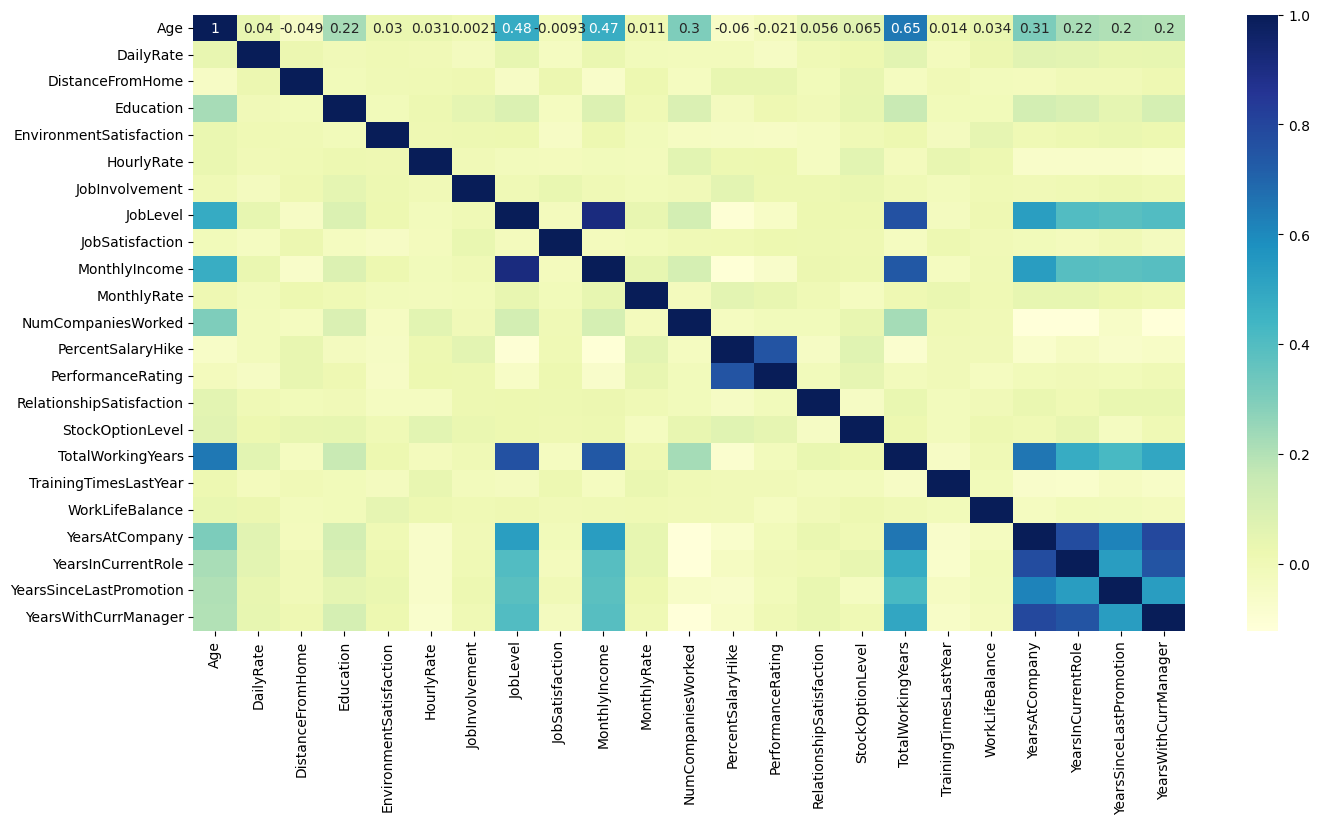

In [12]:
plt.figure(figsize=(16,8))
corr = train_data[numerical_col].corr()
plot = sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

In [13]:
columns = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']
num_col = ['newage', 'masterylevel', 'loyaltylevel', 'DailyRate', 'DistanceFromHome',  'Education',  'EnvironmentSatisfaction',
            'HourlyRate', 'JobInvolvement', 'JobSatisfaction',  'MonthlyIncome',  'NumCompaniesWorked', 'PerformanceRating',
            'RelationshipSatisfaction',  'StockOptionLevel',  'TrainingTimesLastYear',  'WorkLifeBalance','oldyoung', 'loyal']

In [14]:
train_data[num_col].corrwith(train_data['Attrition'])

DailyRate                  -0.022380
DistanceFromHome            0.024741
Education                  -0.084305
EnvironmentSatisfaction    -0.092426
HourlyRate                 -0.037280
JobInvolvement             -0.139929
JobSatisfaction            -0.061010
MonthlyIncome              -0.126896
NumCompaniesWorked          0.037127
PerformanceRating           0.013666
RelationshipSatisfaction   -0.087537
StockOptionLevel           -0.194018
TrainingTimesLastYear      -0.018595
WorkLifeBalance            -0.045365
dtype: float64

In [15]:
# plt.figure(figsize=(16,8))
# corr = train_data[num_col].corr()
# plot = sns.heatmap(corr, cmap="YlGnBu", annot=True)
# plt.show()